In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\bever\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
%matplotlib inline

In [4]:
import os
import joblib
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

## Dataset
https://www.kaggle.com/uciml/mushroom-classification

## Website with further information about the data
https://archive.ics.uci.edu/ml/datasets/Mushroom

## Context
Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

## Content
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

Time period: Donated to UCI ML 27 April 1987

## Read the csv file

In [5]:
df = pd.read_csv(os.path.join("data", "mushrooms.csv"))
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Check for Null Values

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
# Output the data
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
## Since There are no null values we don't have anything we need to get rid of due to null values

## Feature Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

# Target Data
class:edible=e, poisonous=p

# Mushroom Diagram
![Mushroom Diagram](images/structure-mushroom.jpg)


## Mushroom Parts
Cap: The cap is the top of the mushroom (and often looks sort of like a small umbrella). Mushroom caps can come in a variety of colors but most often are brown, white, or yellow.

Gills, Pores, or Teeth: These structures appear under the mushroom's cap. They look similar to a fish's gills.

Ring: The ring (sometimes called the annulus) is the remaining structure of the partial veil after the gills have pushed through.

Stem or Stipe: The stem is the tall structure that holds the cap high above the ground.

Volva: The volva is the protective veil that remains after the mushroom sprouted up from the ground. As the fungus grows, it breaks through the volva.

Spores: Microscopic seeds acting as reproductive agents; they are usually released into the air and fall on a substrate to produce a new mushroom.

(resource:http://www.visualdictionaryonline.com/plants-gardening/plants/mushroom/structure-mushroom.php)

# Change class
class:edible=e, poisonous=p

In [9]:
df['class']

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [10]:
df['class'] = df['class'].replace(['e','p'],['edible','poisonous'])
df['class']

0       poisonous
1          edible
2          edible
3       poisonous
4          edible
          ...    
8119       edible
8120       edible
8121       edible
8122    poisonous
8123       edible
Name: class, Length: 8124, dtype: object

# Change cap-shape
cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

In [11]:
df['cap-shape']

0       x
1       x
2       b
3       x
4       x
       ..
8119    k
8120    x
8121    f
8122    k
8123    x
Name: cap-shape, Length: 8124, dtype: object

In [12]:

df['cap-shape'] = df['cap-shape'].replace(['b','c','x','f','k','s'],['bell','conical','convex','flat', 'knobbed', 'sunken' ])
df['cap-shape']

0        convex
1        convex
2          bell
3        convex
4        convex
         ...   
8119    knobbed
8120     convex
8121       flat
8122    knobbed
8123     convex
Name: cap-shape, Length: 8124, dtype: object

# Mushroom cap shape
![Mushroom cap shape](images/mushroom-cap-shapes.jpg)


(resource:https://midwestmycology.org/mushroom-cap-shapes/)

# Change cap-surface
cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

In [13]:
df['cap-surface']

0       s
1       s
2       s
3       y
4       s
       ..
8119    s
8120    s
8121    s
8122    y
8123    s
Name: cap-surface, Length: 8124, dtype: object

In [14]:

df['cap-surface'] = df['cap-surface'].replace(['f','g','y','s'],['fibrous','grooves','scaly','smooth'])
df['cap-surface']

0       smooth
1       smooth
2       smooth
3        scaly
4       smooth
         ...  
8119    smooth
8120    smooth
8121    smooth
8122     scaly
8123    smooth
Name: cap-surface, Length: 8124, dtype: object


# Mushroom cap surface
![Mushroom cap surface](images/mushroom-cap-surface.jpg)


(resource:https://datascienceplus.com/mushrooms-classification-part-1/)


# Change cap-color
cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y

In [15]:
df['cap-color']

0       n
1       y
2       w
3       w
4       g
       ..
8119    n
8120    n
8121    n
8122    n
8123    n
Name: cap-color, Length: 8124, dtype: object

In [16]:
df['cap-color'] = df['cap-color'].replace(['n','b','c','g','r','p','u','e','w','y'],['brown','buff','cinnamon','gray','green', 'pink','purple','red','white','yellow'])
df['cap-color']

0        brown
1       yellow
2        white
3        white
4         gray
         ...  
8119     brown
8120     brown
8121     brown
8122     brown
8123     brown
Name: cap-color, Length: 8124, dtype: object

# Change bruises
bruises: bruises=t,no=f

In [17]:
df['bruises']

0       t
1       t
2       t
3       t
4       f
       ..
8119    f
8120    f
8121    f
8122    f
8123    f
Name: bruises, Length: 8124, dtype: object

In [18]:
df['bruises'] = df['bruises'].replace(['t','f'],['bruises','no'])
df['bruises']

0       bruises
1       bruises
2       bruises
3       bruises
4            no
         ...   
8119         no
8120         no
8121         no
8122         no
8123         no
Name: bruises, Length: 8124, dtype: object

# Change gill-attachment
gill-attachment: attached=a,descending=d,free=f,notched=n

In [19]:
df['gill-attachment']

0       f
1       f
2       f
3       f
4       f
       ..
8119    a
8120    a
8121    a
8122    f
8123    a
Name: gill-attachment, Length: 8124, dtype: object

In [20]:
df['gill-attachment'] = df['gill-attachment'].replace(['a','d','f','n'],['attached','descending','free','notched'])
df['gill-attachment']

0           free
1           free
2           free
3           free
4           free
          ...   
8119    attached
8120    attached
8121    attached
8122        free
8123    attached
Name: gill-attachment, Length: 8124, dtype: object

# Change order
odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s

In [21]:
df['odor']

0       p
1       a
2       l
3       p
4       n
       ..
8119    n
8120    n
8121    n
8122    y
8123    n
Name: odor, Length: 8124, dtype: object

In [22]:
df['odor'] = df['odor'].replace(['a','l','c','y','f','m','n','p','s'],['almond','anise','creosote','fishy','foul','musty','none','pungent','spicy'])
df['odor']

0       pungent
1        almond
2         anise
3       pungent
4          none
         ...   
8119       none
8120       none
8121       none
8122      fishy
8123       none
Name: odor, Length: 8124, dtype: object

# Change gill-spacing
gill-spacing: close=c,crowded=w,distant=d

In [23]:
df['gill-spacing']

0       c
1       c
2       c
3       c
4       w
       ..
8119    c
8120    c
8121    c
8122    c
8123    c
Name: gill-spacing, Length: 8124, dtype: object

In [24]:
df['gill-spacing'] = df['gill-spacing'].replace(['c','w','d'],['close','crowded','distant'])
df['gill-spacing']

0         close
1         close
2         close
3         close
4       crowded
         ...   
8119      close
8120      close
8121      close
8122      close
8123      close
Name: gill-spacing, Length: 8124, dtype: object

# Change gill-size
gill-size: broad=b,narrow=n

In [25]:
df['gill-size']

0       n
1       b
2       b
3       n
4       b
       ..
8119    b
8120    b
8121    b
8122    n
8123    b
Name: gill-size, Length: 8124, dtype: object

In [26]:
df['gill-size'] = df['gill-size'].replace(['b','n'],['broad','narrow'])
df['gill-size']

0       narrow
1        broad
2        broad
3       narrow
4        broad
         ...  
8119     broad
8120     broad
8121     broad
8122    narrow
8123     broad
Name: gill-size, Length: 8124, dtype: object

# Change gill-color
gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y

In [27]:
df['gill-color']

0       k
1       k
2       n
3       n
4       k
       ..
8119    y
8120    y
8121    n
8122    b
8123    y
Name: gill-color, Length: 8124, dtype: object

In [28]:
df['gill-color'] = df['gill-color'].replace(['k','n','b','h','g','r','o','p','u','e','w','y'],['black','brown','buff','chocolate','gray', 'green','orange','pink','purple','red', 'white','yellow'])
df['gill-color']

0        black
1        black
2        brown
3        brown
4        black
         ...  
8119    yellow
8120    yellow
8121     brown
8122      buff
8123    yellow
Name: gill-color, Length: 8124, dtype: object

# Change stalk-shape
stalk-shape: enlarging=e,tapering=t

In [29]:
df['stalk-shape']

0       e
1       e
2       e
3       e
4       t
       ..
8119    e
8120    e
8121    e
8122    t
8123    e
Name: stalk-shape, Length: 8124, dtype: object

In [30]:
df['stalk-shape'] = df['stalk-shape'].replace(['e','t'],['enlarging','tapering'])
df['stalk-shape']

0       enlarging
1       enlarging
2       enlarging
3       enlarging
4        tapering
          ...    
8119    enlarging
8120    enlarging
8121    enlarging
8122     tapering
8123    enlarging
Name: stalk-shape, Length: 8124, dtype: object

# Change stalk-root
stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?

In [31]:
df['stalk-root']

0       e
1       c
2       c
3       e
4       e
       ..
8119    ?
8120    ?
8121    ?
8122    ?
8123    ?
Name: stalk-root, Length: 8124, dtype: object

In [32]:
df['stalk-root'] = df['stalk-root'].replace(['b','c','u','e','z','r','?'],['bulbous','club','cup','equal', 'rhizomorphs','rooted','missing'])
df['stalk-root']

0         equal
1          club
2          club
3         equal
4         equal
         ...   
8119    missing
8120    missing
8121    missing
8122    missing
8123    missing
Name: stalk-root, Length: 8124, dtype: object

# Change stalk-surface-above-ring
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

In [33]:
df['stalk-surface-above-ring']

0       s
1       s
2       s
3       s
4       s
       ..
8119    s
8120    s
8121    s
8122    s
8123    s
Name: stalk-surface-above-ring, Length: 8124, dtype: object

In [34]:
df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].replace(['f','y','k','s'],['fibrous','scaly','silky','smooth'])
df['stalk-surface-above-ring']

0       smooth
1       smooth
2       smooth
3       smooth
4       smooth
         ...  
8119    smooth
8120    smooth
8121    smooth
8122    smooth
8123    smooth
Name: stalk-surface-above-ring, Length: 8124, dtype: object

# Change stalk-surface-below-ring
stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s


In [35]:
df['stalk-surface-below-ring']

0       s
1       s
2       s
3       s
4       s
       ..
8119    s
8120    s
8121    s
8122    k
8123    s
Name: stalk-surface-below-ring, Length: 8124, dtype: object

In [36]:
# stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].replace(['f','y','k','s'],['fibrous','scaly','silky','smooth'])
df['stalk-surface-below-ring']

0       smooth
1       smooth
2       smooth
3       smooth
4       smooth
         ...  
8119    smooth
8120    smooth
8121    smooth
8122     silky
8123    smooth
Name: stalk-surface-below-ring, Length: 8124, dtype: object

In [37]:
# Change stalk-color-above-ring
# stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

In [38]:
df['stalk-color-above-ring']

0       w
1       w
2       w
3       w
4       w
       ..
8119    o
8120    o
8121    o
8122    w
8123    o
Name: stalk-color-above-ring, Length: 8124, dtype: object

In [39]:
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].replace(['n','b','c','g','o','p','e','w','y'],['brown','buff','cinnamon','gray','orange','pink','red','white','yellow'])
df['stalk-color-above-ring']

0        white
1        white
2        white
3        white
4        white
         ...  
8119    orange
8120    orange
8121    orange
8122     white
8123    orange
Name: stalk-color-above-ring, Length: 8124, dtype: object

# Change stalk-color-below-ring
stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

In [40]:
df['stalk-color-below-ring']

0       w
1       w
2       w
3       w
4       w
       ..
8119    o
8120    o
8121    o
8122    w
8123    o
Name: stalk-color-below-ring, Length: 8124, dtype: object

In [41]:
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].replace(['n','b','c','g','o','p','e','w','y'],['brown','buff','cinnamon','gray','orange','pink','red','white','yellow'])
df['stalk-color-below-ring']

0        white
1        white
2        white
3        white
4        white
         ...  
8119    orange
8120    orange
8121    orange
8122     white
8123    orange
Name: stalk-color-below-ring, Length: 8124, dtype: object

# Change Veil-type
veil-type: partial=p,universal=u

In [42]:
df['veil-type']

0       p
1       p
2       p
3       p
4       p
       ..
8119    p
8120    p
8121    p
8122    p
8123    p
Name: veil-type, Length: 8124, dtype: object

In [43]:
df['veil-type'] = df['veil-type'].replace(['p','u'],['partial','universal'])
df['veil-type']

0       partial
1       partial
2       partial
3       partial
4       partial
         ...   
8119    partial
8120    partial
8121    partial
8122    partial
8123    partial
Name: veil-type, Length: 8124, dtype: object

# Change veil-color
veil-color: brown=n,orange=o,white=w,yellow=y

In [44]:
df['veil-color']

0       w
1       w
2       w
3       w
4       w
       ..
8119    o
8120    n
8121    o
8122    w
8123    o
Name: veil-color, Length: 8124, dtype: object

In [45]:
df['veil-color'] = df['veil-color'].replace(['b','o','w','y'],['brown','orange','white','yellow'])
df['veil-color']

0        white
1        white
2        white
3        white
4        white
         ...  
8119    orange
8120         n
8121    orange
8122     white
8123    orange
Name: veil-color, Length: 8124, dtype: object

# Change ring-number
ring-number: none=n,one=o,two=t

In [46]:
df['ring-number']

0       o
1       o
2       o
3       o
4       o
       ..
8119    o
8120    o
8121    o
8122    o
8123    o
Name: ring-number, Length: 8124, dtype: object

In [47]:
df['ring-number'] = df['ring-number'].replace(['n','o','t'],['none','one','two'])
df['ring-number']

0       one
1       one
2       one
3       one
4       one
       ... 
8119    one
8120    one
8121    one
8122    one
8123    one
Name: ring-number, Length: 8124, dtype: object

# Change ring-type
ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z

In [48]:
df['ring-type']

0       p
1       p
2       p
3       p
4       e
       ..
8119    p
8120    p
8121    p
8122    e
8123    p
Name: ring-type, Length: 8124, dtype: object

In [49]:
df['ring-type'] = df['ring-type'].replace(['c','e','f','l','n','p','s','z'],['cobwebby','evanescent','flaring','large','none','pendant','sheathing','zone'])
df['ring-type']

0          pendant
1          pendant
2          pendant
3          pendant
4       evanescent
           ...    
8119       pendant
8120       pendant
8121       pendant
8122    evanescent
8123       pendant
Name: ring-type, Length: 8124, dtype: object

# Change spore-print-color
spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y

In [50]:
df['spore-print-color']

0       k
1       n
2       n
3       k
4       n
       ..
8119    b
8120    b
8121    b
8122    w
8123    o
Name: spore-print-color, Length: 8124, dtype: object

In [51]:
df['spore-print-color'] = df['spore-print-color'].replace(['k','n','b','h','r','o','u','w','y'],['black','brown','buff','chocolate','green','orange','purple','white','yellow'])
df['spore-print-color']

0        black
1        brown
2        brown
3        black
4        brown
         ...  
8119      buff
8120      buff
8121      buff
8122     white
8123    orange
Name: spore-print-color, Length: 8124, dtype: object

# Change population
population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y

In [52]:
df['population']

0       s
1       n
2       n
3       s
4       a
       ..
8119    c
8120    v
8121    c
8122    v
8123    c
Name: population, Length: 8124, dtype: object

In [53]:
df['population'] = df['population'].replace(['a','c','n','s','v','y'],['abundant','clustered','numerous','scattered','several','solitary'])
df['population']

0       scattered
1        numerous
2        numerous
3       scattered
4        abundant
          ...    
8119    clustered
8120      several
8121    clustered
8122      several
8123    clustered
Name: population, Length: 8124, dtype: object

# Change habitat
habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [54]:
df['habitat']

0       u
1       g
2       m
3       u
4       g
       ..
8119    l
8120    l
8121    l
8122    l
8123    l
Name: habitat, Length: 8124, dtype: object

In [55]:
df['habitat'] = df['habitat'].replace(['g','l','m','p','u','w','d'],['grasses','leaves','meadows','paths','urban','waste','woods'])
df['habitat']

0         urban
1       grasses
2       meadows
3         urban
4       grasses
         ...   
8119     leaves
8120     leaves
8121     leaves
8122     leaves
8123     leaves
Name: habitat, Length: 8124, dtype: object

In [56]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [57]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Evaluate Features to determine the correct features to use for our model

## poisonous vs edible

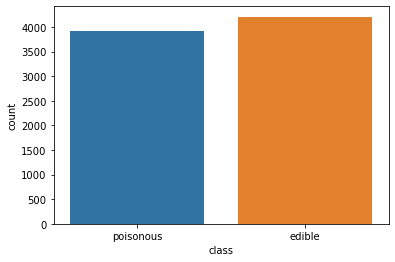

In [58]:
sns.countplot(df['class']);

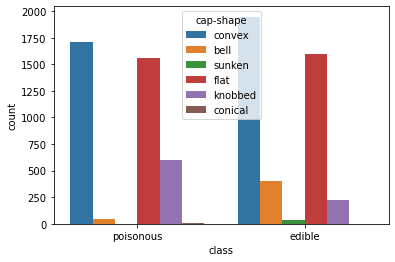

In [59]:
x = sns.countplot(x='class', hue='cap-shape',data=df)

In [60]:
# Use all features to evaluate which features to use.
selected_features = df.drop("class", axis=1)
selected_features_names = selected_features.columns
selected_features.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


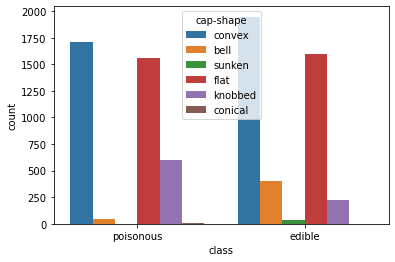

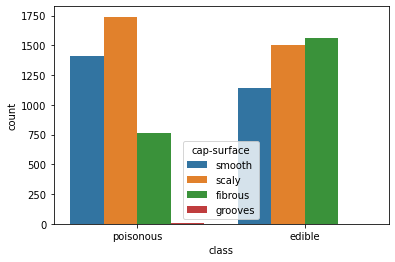

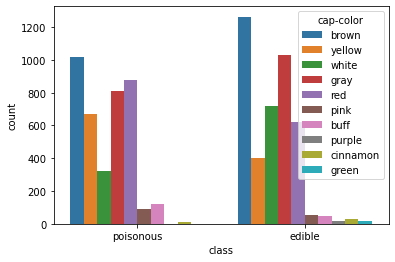

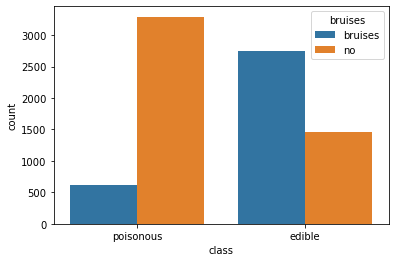

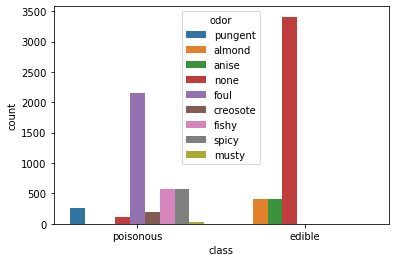

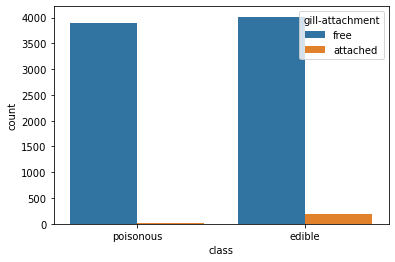

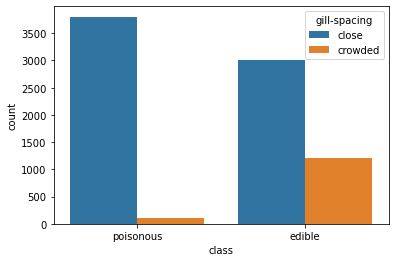

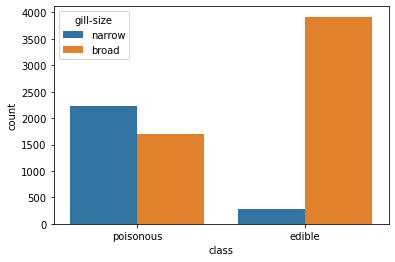

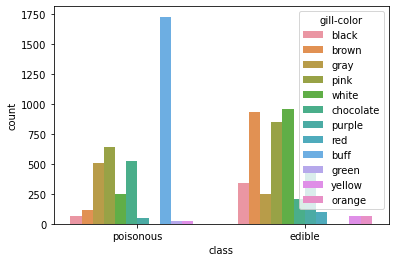

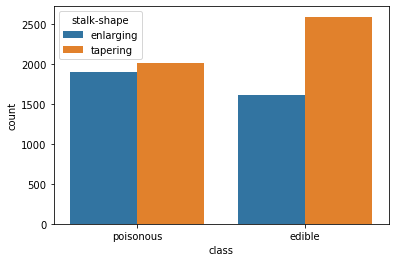

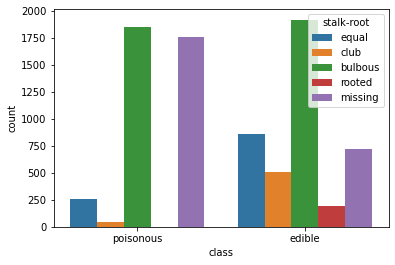

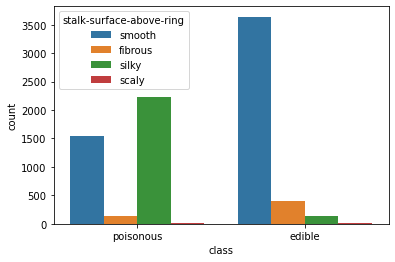

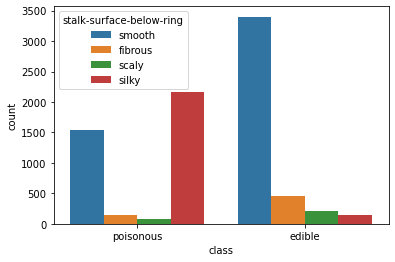

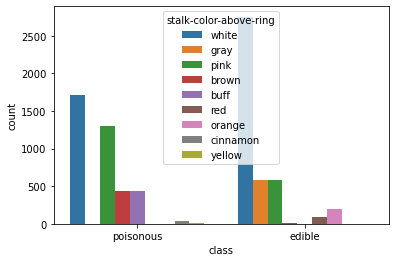

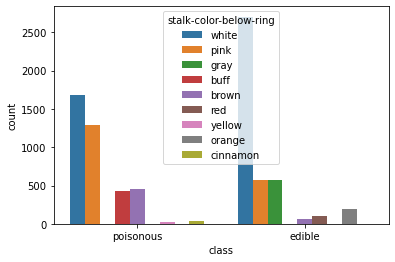

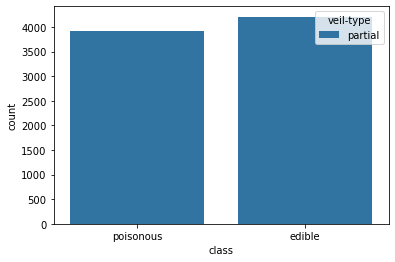

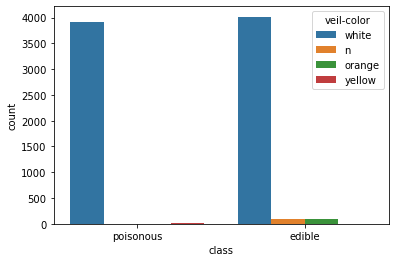

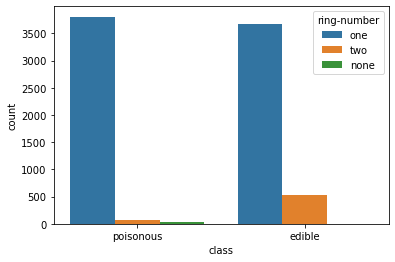

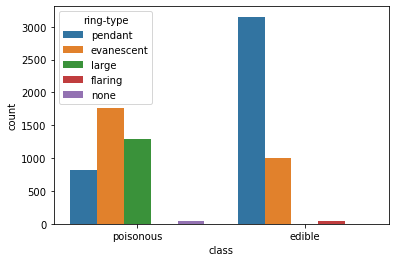

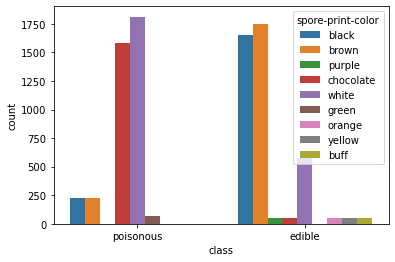

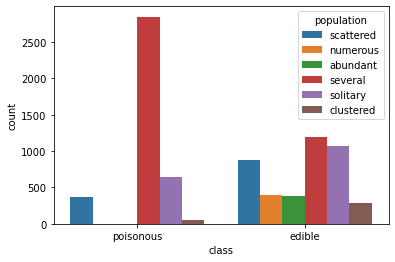

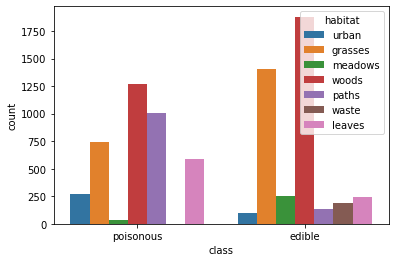

In [61]:
# Create a chart for all features showing poisonous vs edible
for column in selected_features.columns:
    sns.countplot(x='class', hue=column, data=df)
    plt.savefig(os.path.join("images", column))
    plt.show()

In [62]:
# Perform Categorical encoding
from sklearn.preprocessing import LabelEncoder
X=df.drop('class',axis=1) #Predictors
y=df['class']

Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [63]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,0,0,7,1,0,1,0,0,...,3,7,7,0,2,1,4,0,3,4
1,2,3,9,0,0,1,0,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,3,8,0,1,1,0,0,1,0,...,3,7,7,0,2,1,4,1,2,2
3,2,2,8,0,7,1,0,1,1,0,...,3,7,7,0,2,1,4,0,3,4
4,2,3,3,1,6,1,1,0,0,1,...,3,7,7,0,2,1,0,1,0,0


In [64]:
y

array([1, 0, 0, ..., 0, 1, 0])

# Determine Feature Importance

Feature 0 - cap-shape, Score: 0.013813630712688475
Feature 1 - cap-surface, Score: 0.04588107432071427
Feature 2 - cap-color, Score: 0.0016209194226395245
Feature 3 - bruises, Score: 0.3741956105210228
Feature 4 - odor, Score: 0.007542916084986791
Feature 5 - gill-attachment, Score: 0.3826431004392035
Feature 6 - gill-spacing, Score: -0.566861915803495
Feature 7 - gill-size, Score: 0.4583169822532783
Feature 8 - gill-color, Score: -0.005481746518588057
Feature 9 - stalk-shape, Score: -0.13325412471099418
Feature 10 - stalk-root, Score: -0.15764500026017145
Feature 11 - stalk-surface-above-ring, Score: -0.06816898101290109
Feature 12 - stalk-surface-below-ring, Score: -0.04861136570900631
Feature 13 - stalk-color-above-ring, Score: -0.01400231589202054
Feature 14 - stalk-color-below-ring, Score: 0.012827343592604014
Feature 15 - veil-type, Score: 8.326672684688674e-17
Feature 16 - veil-color, Score: 0.10045253871622759
Feature 17 - ring-number, Score: -0.15826775095248685
Feature 18 - r

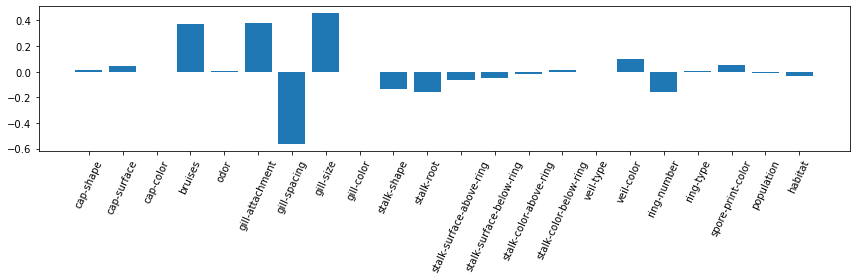

In [65]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/

from sklearn.linear_model import LinearRegression
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature {i} - {X.columns[i]}, Score: {v}')

# plot feature importance
fig, ax = plt.subplots(figsize = (12,4))
plt.bar([x for x in range(len(importance))], importance)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
ax.set_xticklabels(X.columns, rotation=65)
fig.tight_layout()
plt.show()

# Our Chosen Features with the higest numbers to use as our selected features
* Feature 3 - bruises, Score: 0.3741956105210228
* Feature 5 - gill-attachment, Score: 0.3826431004392035
* Feature 6 - gill-spacing, Score: -0.566861915803495
* Feature 7 - gill-size, Score: 0.4583169822532783
* Feature 10 - stalk-root, Score: -0.15764500026017145
* Feature 16 - veil-color, Score: 0.10045253871622759
* Feature 17 - ring-number, Score: -0.15826775095248685

In [66]:
# Set features. This will also be used as your x values.
selected_features = X[['bruises','gill-attachment','gill-spacing','gill-size','stalk-root','veil-color','ring-number']]

selected_features_names = selected_features.columns
selected_features.head()

,bruises,gill-attachment,gill-spacing,gill-size,stalk-root,veil-color,ring-number
0,0,1,0,1,2,2,1
1,0,1,0,0,1,2,1
2,0,1,0,0,1,2,1
3,0,1,0,1,2,2,1
4,1,1,1,0,2,2,1


In [67]:
# Setup Variables to use for our model
target = y
target_names = ["edible", "poisonous"]
data = selected_features
data_names = selected_features_names

# Scaling

Scale the data using the MinMaxScaler and perform some feature selection

In [68]:
# # Scale your data
X_scaler = MinMaxScaler().fit(data)
X_scaled = X_scaler.transform(data)

In [69]:
selected_features_names

Index(['bruises', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-root',
       'veil-color', 'ring-number'],
      dtype='object')

# Create a Train Test Split

Use `class` for the y (target) values

In [70]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(data, target, random_state=42)

In [71]:
X_train_scaled.head()

,bruises,gill-attachment,gill-spacing,gill-size,stalk-root,veil-color,ring-number
3887,1,1,0,1,0,2,1
4119,1,1,0,0,0,2,1
1600,0,1,0,0,0,2,1
4988,1,1,0,0,0,2,1
6757,1,1,0,1,3,2,1


In [72]:
X_test_scaled.head()

,bruises,gill-attachment,gill-spacing,gill-size,stalk-root,veil-color,ring-number
1971,1,1,1,0,2,2,1
6654,1,1,0,1,3,2,1
5606,1,1,0,1,3,2,1
3332,0,1,0,0,0,2,1
6988,1,1,0,1,3,2,1


In [73]:
y_train

array([1, 1, 0, ..., 0, 1, 0])

In [74]:
y_test

array([0, 1, 1, ..., 0, 0, 1])

# Train the Model



In [75]:
rf = RandomForestClassifier()
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.946824224519941

In [76]:
# Output the training and testing score for the model
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 0.9481372066305597
Testing Data Score: 0.946824224519941


In [77]:
rf

RandomForestClassifier()

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [78]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust

param_grid = {'n_estimators': [50, 100, 150, 200, 250],
              'max_depth': [10, 20, 30, 40],
             'max_features': ['auto', 'sqrt','log2']}
grid = GridSearchCV(rf, param_grid, verbose=3)

In [79]:
# Train the model with GridSearch
grid_result = grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] max_depth=10, max_features=auto, n_estimators=50 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, max_features=auto, n_estimators=50, score=0.950, total=   0.2s
[CV] max_depth=10, max_features=auto, n_estimators=50 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=10, max_features=auto, n_estimators=50, score=0.949, total=   0.2s
[CV] max_depth=10, max_features=auto, n_estimators=50 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=10, max_features=auto, n_estimators=50, score=0.947, total=   0.2s
[CV] max_depth=10, max_features=auto, n_estimators=50 ................
[CV]  max_depth=10, max_features=auto, n_estimators=50, score=0.956, total=   0.3s
[CV] max_depth=10, max_features=auto, n_estimators=50 ................
[CV]  max_depth=10, max_features=auto, n_estimators=50, score=0.939, total=   0.2s
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=100, score=0.950, total=   0.4s
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=100, score=0.949, total=   0.4s
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=100, score=0.947, total=   0.4s
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=100, score=0.956, tot

[CV]  max_depth=10, max_features=log2, n_estimators=100, score=0.950, total=   0.4s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=100, score=0.949, total=   0.4s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=100, score=0.947, total=   0.5s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=100, score=0.956, total=   0.4s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=100, score=0.939, total=   0.4s
[CV] max_depth=10, max_features=log2, n_estimators=150 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=150, score=0.950, total=   0.7s
[CV] max_depth=10, max_features=log2, n_estimators=150 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=150, score=0.949, 

[CV]  max_depth=20, max_features=sqrt, n_estimators=100, score=0.956, total=   0.5s
[CV] max_depth=20, max_features=sqrt, n_estimators=100 ...............
[CV]  max_depth=20, max_features=sqrt, n_estimators=100, score=0.939, total=   0.4s
[CV] max_depth=20, max_features=sqrt, n_estimators=150 ...............
[CV]  max_depth=20, max_features=sqrt, n_estimators=150, score=0.950, total=   0.7s
[CV] max_depth=20, max_features=sqrt, n_estimators=150 ...............
[CV]  max_depth=20, max_features=sqrt, n_estimators=150, score=0.949, total=   0.6s
[CV] max_depth=20, max_features=sqrt, n_estimators=150 ...............
[CV]  max_depth=20, max_features=sqrt, n_estimators=150, score=0.947, total=   0.7s
[CV] max_depth=20, max_features=sqrt, n_estimators=150 ...............
[CV]  max_depth=20, max_features=sqrt, n_estimators=150, score=0.956, total=   0.6s
[CV] max_depth=20, max_features=sqrt, n_estimators=150 ...............
[CV]  max_depth=20, max_features=sqrt, n_estimators=150, score=0.939, 

[CV]  max_depth=30, max_features=auto, n_estimators=150, score=0.949, total=   0.6s
[CV] max_depth=30, max_features=auto, n_estimators=150 ...............
[CV]  max_depth=30, max_features=auto, n_estimators=150, score=0.947, total=   0.7s
[CV] max_depth=30, max_features=auto, n_estimators=150 ...............
[CV]  max_depth=30, max_features=auto, n_estimators=150, score=0.956, total=   0.6s
[CV] max_depth=30, max_features=auto, n_estimators=150 ...............
[CV]  max_depth=30, max_features=auto, n_estimators=150, score=0.939, total=   0.7s
[CV] max_depth=30, max_features=auto, n_estimators=200 ...............
[CV]  max_depth=30, max_features=auto, n_estimators=200, score=0.950, total=   0.8s
[CV] max_depth=30, max_features=auto, n_estimators=200 ...............
[CV]  max_depth=30, max_features=auto, n_estimators=200, score=0.949, total=   0.8s
[CV] max_depth=30, max_features=auto, n_estimators=200 ...............
[CV]  max_depth=30, max_features=auto, n_estimators=200, score=0.947, 

[CV]  max_depth=30, max_features=log2, n_estimators=150, score=0.939, total=   0.6s
[CV] max_depth=30, max_features=log2, n_estimators=200 ...............
[CV]  max_depth=30, max_features=log2, n_estimators=200, score=0.950, total=   0.9s
[CV] max_depth=30, max_features=log2, n_estimators=200 ...............
[CV]  max_depth=30, max_features=log2, n_estimators=200, score=0.949, total=   0.8s
[CV] max_depth=30, max_features=log2, n_estimators=200 ...............
[CV]  max_depth=30, max_features=log2, n_estimators=200, score=0.947, total=   0.8s
[CV] max_depth=30, max_features=log2, n_estimators=200 ...............
[CV]  max_depth=30, max_features=log2, n_estimators=200, score=0.956, total=   0.8s
[CV] max_depth=30, max_features=log2, n_estimators=200 ...............
[CV]  max_depth=30, max_features=log2, n_estimators=200, score=0.939, total=   0.9s
[CV] max_depth=30, max_features=log2, n_estimators=250 ...............
[CV]  max_depth=30, max_features=log2, n_estimators=250, score=0.950, 

[CV]  max_depth=40, max_features=sqrt, n_estimators=200, score=0.947, total=   0.6s
[CV] max_depth=40, max_features=sqrt, n_estimators=200 ...............
[CV]  max_depth=40, max_features=sqrt, n_estimators=200, score=0.956, total=   0.7s
[CV] max_depth=40, max_features=sqrt, n_estimators=200 ...............
[CV]  max_depth=40, max_features=sqrt, n_estimators=200, score=0.939, total=   0.6s
[CV] max_depth=40, max_features=sqrt, n_estimators=250 ...............
[CV]  max_depth=40, max_features=sqrt, n_estimators=250, score=0.950, total=   0.8s
[CV] max_depth=40, max_features=sqrt, n_estimators=250 ...............
[CV]  max_depth=40, max_features=sqrt, n_estimators=250, score=0.949, total=   0.8s
[CV] max_depth=40, max_features=sqrt, n_estimators=250 ...............
[CV]  max_depth=40, max_features=sqrt, n_estimators=250, score=0.947, total=   0.9s
[CV] max_depth=40, max_features=sqrt, n_estimators=250 ...............
[CV]  max_depth=40, max_features=sqrt, n_estimators=250, score=0.956, 

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  3.1min finished


In [80]:
# Output the grid search best params and best score
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 50}
0.9481369827215772


In [81]:
# Output the grid training and test scores
print(f"Training Data Score: {grid.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {grid.score(X_test_scaled, y_test)}")

Training Data Score: 0.9481372066305597
Testing Data Score: 0.946824224519941


In [82]:
# Found in article https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998
best_params = grid_result.best_params_
best_rf = RandomForestClassifier(max_depth=best_params["max_depth"], max_features=best_params["max_features"], n_estimators=best_params["n_estimators"])
best_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [83]:
# Output the training and test scores for the best params model
print(f"Best Random Forest Training Data Score: {best_rf.score(X_train_scaled, y_train)}")
print(f"Best Random Forest Testing Data Score: {best_rf.score(X_test_scaled, y_test)}")

Best Random Forest Training Data Score: 0.9481372066305597
Best Random Forest Testing Data Score: 0.946824224519941


In [84]:
# Make predictions and calculate classification report
predictions = best_rf.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

      edible       0.93      0.97      0.95      1040
   poisonous       0.97      0.92      0.94       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



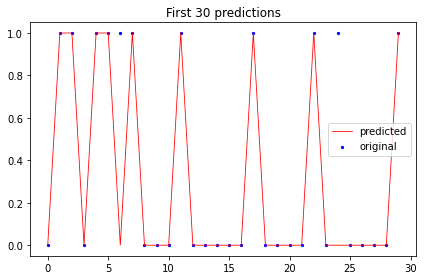

In [85]:
# Create a preduction vs original chart
x_ax = range(len(y_test[:30]))
plt.scatter(x_ax, y_test[:30], s=5, color="blue", label="original")
plt.plot(x_ax, predictions[:30], lw=0.8, color="red", label="predicted")
plt.title('First 30 predictions')
plt.legend()
# Save the plot
plt.tight_layout()
plt.savefig(os.path.join("images", "random_forest_plot.png"))
# Show the figure
plt.show()

# Save the Model

In [86]:
# Save the model
filename = os.path.join("models", "model_random_forest.sav")
joblib.dump(best_rf, filename)

['models\\model_random_forest.sav']

# Save the Grid

In [87]:
# Save the grid
filename = os.path.join("models", "grid_random_forest.sav")
joblib.dump(grid, filename)

['models\\grid_random_forest.sav']